In [930]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout,LSTM,BatchNormalization

from sklearn.preprocessing import MinMaxScaler

In [931]:
data = pd.read_csv('AirPassengers.csv')
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


##### As we don't need month column we can drop it

In [932]:
data = data.drop('Month',axis=1)
data.head()

,#Passengers
0,112
1,118
2,132
3,129
4,121


##### we need to convert this into numpy array

In [933]:
data = np.array(data)

In [934]:
data

array([[112],
       [118],
       [132],
       [129],
       [121],
       [135],
       [148],
       [148],
       [136],
       [119],
       [104],
       [118],
       [115],
       [126],
       [141],
       [135],
       [125],
       [149],
       [170],
       [170],
       [158],
       [133],
       [114],
       [140],
       [145],
       [150],
       [178],
       [163],
       [172],
       [178],
       [199],
       [199],
       [184],
       [162],
       [146],
       [166],
       [171],
       [180],
       [193],
       [181],
       [183],
       [218],
       [230],
       [242],
       [209],
       [191],
       [172],
       [194],
       [196],
       [196],
       [236],
       [235],
       [229],
       [243],
       [264],
       [272],
       [237],
       [211],
       [180],
       [201],
       [204],
       [188],
       [235],
       [227],
       [234],
       [264],
       [302],
       [293],
       [259],
       [229],
       [203],
      

In [935]:
data.shape

(144, 1)

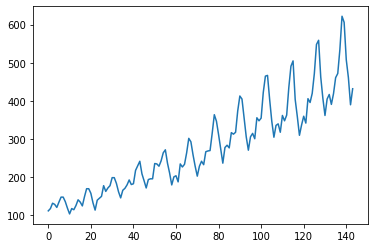

In [936]:
plt.plot(data)  #we can see that our data has ups and downs between months

#### Standardizing the data

In [937]:
scalar = MinMaxScaler()
data = scalar.fit_transform(data)
data.min(),data.max()

(0.0, 1.0)

##### splitting the data into train and test data

###### we will take 100 data points for training and 44 data points for testing

In [938]:
train_size = 100
test_size = 44

In [939]:
train = data[0:100,:]
test = data[100:144,:]
train.shape,test.shape

((100, 1), (44, 1))

###### now, we will build our testing and training data using looping as we want 1st day data into x_train and next day data into y_train,i.e if we take 112 in x_train then y_train should be 118

### Building testing and training data

In [940]:
def get_data(data,loop_back):
    data_x,data_y=[],[]
    for i in range(len(data)-loop_back):
        a = data[i:(i+loop_back),0]
        data_x.append(a)
        data_y.append(data[i+loop_back,0])
    return np.array(data_x),np.array(data_y)

In [941]:
loop_back = 1
x_train,y_train = get_data(train,loop_back)
x_train.shape,y_train.shape

((99, 1), (99,))

In [942]:
x_train

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [943]:
y_train

array([0.02702703, 0.05405405, 0.04826255, 0.03281853, 0.05984556,
       0.08494208, 0.08494208, 0.06177606, 0.02895753, 0.        ,
       0.02702703, 0.02123552, 0.04247104, 0.07142857, 0.05984556,
       0.04054054, 0.08687259, 0.12741313, 0.12741313, 0.1042471 ,
       0.05598456, 0.01930502, 0.06949807, 0.07915058, 0.08880309,
       0.14285714, 0.11389961, 0.13127413, 0.14285714, 0.18339768,
       0.18339768, 0.15444015, 0.11196911, 0.08108108, 0.11969112,
       0.12934363, 0.14671815, 0.17181467, 0.14864865, 0.15250965,
       0.22007722, 0.24324324, 0.26640927, 0.2027027 , 0.16795367,
       0.13127413, 0.17374517, 0.17760618, 0.17760618, 0.25482625,
       0.25289575, 0.24131274, 0.26833977, 0.30888031, 0.32432432,
       0.25675676, 0.20656371, 0.14671815, 0.18725869, 0.19305019,
       0.16216216, 0.25289575, 0.23745174, 0.25096525, 0.30888031,
       0.38223938, 0.36486486, 0.2992278 , 0.24131274, 0.19111969,
       0.24131274, 0.26640927, 0.24903475, 0.31467181, 0.31853

##### we can see that 1st value in y_train is 2nd value in x_test, similar operation can be done on test data

In [944]:
x_test,y_test = get_data(test,loop_back)
x_test.shape,y_test.shape

((43, 1), (43,))

###### Reshape x_train and x_test into 3D array as neural network takes 3D data

In [945]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [946]:
x_test.shape,x_train.shape

((43, 1, 1), (99, 1, 1))

## Build the model

In [947]:
model = Sequential()
model.add(LSTM(5,activation='relu',input_shape=(x_train.shape[1],x_train.shape[2]),return_sequences=True))


model.add(LSTM(6,activation='relu',return_sequences=True))


model.add(LSTM(7,activation='relu',return_sequences=True))
model.add(LSTM(8,activation='relu'))



model.add(Dense(1))

          


In [948]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=150,batch_size=2)

Train on 99 samples
Epoch 1/150
99/99 [==============================] - 9s 90ms/sample - loss: 0.0597
Epoch 2/150
99/99 [==============================] - 0s 2ms/sample - loss: 0.0430
Epoch 3/150
99/99 [==============================] - 0s 2ms/sample - loss: 0.0320
Epoch 4/150
99/99 [==============================] - 0s 2ms/sample - loss: 0.0253
Epoch 5/150
99/99 [==============================] - 0s 2ms/sample - loss: 0.0218
Epoch 6/150
99/99 [==============================] - 0s 2ms/sample - loss: 0.0203
Epoch 7/150
99/99 [==============================] - 0s 2ms/sample - loss: 0.0199
Epoch 8/150
99/99 [==============================] - 0s 2ms/sample - loss: 0.0198
Epoch 9/150
99/99 [==============================] - 0s 2ms/sample - loss: 0.0197
Epoch 10/150
99/99 [==============================] - 0s 2ms/sample - loss: 0.0195
Epoch 11/150
99/99 [==============================] - 0s 2ms/sample - loss: 0.0195
Epoch 12/150
99/99 [==============================] - 0s 2ms/sample - loss:

In [949]:
y_pred = model.predict(x_test)

In [950]:
y_pred=scalar.inverse_transform(y_pred)
y_pred

array([[345.06647],
       [412.47327],
       [460.78714],
       [463.12582],
       [393.40213],
       [337.6794 ],
       [301.2417 ],
       [327.75504],
       [331.33276],
       [312.09848],
       [351.64688],
       [338.595  ],
       [352.59595],
       [426.67612],
       [491.79398],
       [509.01508],
       [393.40213],
       [348.8134 ],
       [305.37256],
       [328.64606],
       [349.75577],
       [333.13492],
       [395.48663],
       [385.15054],
       [410.3201 ],
       [469.00668],
       [564.01465],
       [578.5521 ],
       [458.45654],
       [396.53226],
       [351.64688],
       [394.44333],
       [407.1061 ],
       [380.06427],
       [409.24652],
       [456.13373],
       [469.00668],
       [547.06964],
       [664.841  ],
       [642.491  ],
       [512.7511 ],
       [456.13373],
       [379.05344]], dtype=float32)

In [951]:
y_test

array([0.61389961, 0.6969112 , 0.7007722 , 0.57915058, 0.46911197,
       0.38803089, 0.44787645, 0.45559846, 0.41312741, 0.4980695 ,
       0.47104247, 0.5       , 0.63899614, 0.74710425, 0.77413127,
       0.57915058, 0.49227799, 0.3976834 , 0.44980695, 0.49420849,
       0.45945946, 0.58301158, 0.56370656, 0.61003861, 0.71042471,
       0.85714286, 0.87837838, 0.69305019, 0.58494208, 0.4980695 ,
       0.58108108, 0.6042471 , 0.55405405, 0.60810811, 0.68918919,
       0.71042471, 0.83204633, 1.        , 0.96911197, 0.77992278,
       0.68918919, 0.55212355, 0.63320463])

In [952]:
y_test = np.array(y_test)

In [953]:
y_test=y_test.reshape(-1,1)

In [954]:
y_test = scalar.inverse_transform(y_test)
y_test

array([[422.],
       [465.],
       [467.],
       [404.],
       [347.],
       [305.],
       [336.],
       [340.],
       [318.],
       [362.],
       [348.],
       [363.],
       [435.],
       [491.],
       [505.],
       [404.],
       [359.],
       [310.],
       [337.],
       [360.],
       [342.],
       [406.],
       [396.],
       [420.],
       [472.],
       [548.],
       [559.],
       [463.],
       [407.],
       [362.],
       [405.],
       [417.],
       [391.],
       [419.],
       [461.],
       [472.],
       [535.],
       [622.],
       [606.],
       [508.],
       [461.],
       [390.],
       [432.]])

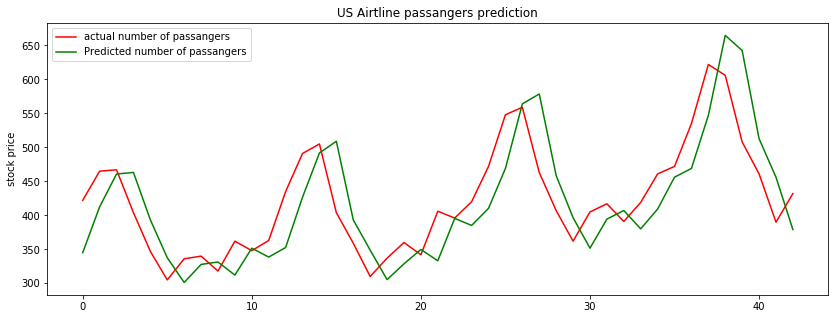

In [955]:

plt.figure(figsize=(14,5))
plt.plot(y_test, color='red',label='actual number of passangers')
plt.plot(y_pred,color='green',label='Predicted number of passangers')
plt.title('US Airtline passangers prediction')
plt.ylabel('stock price')
plt.legend()
plt.show()